In [32]:
import keras, tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
from IPython import display
from pathlib import Path
import os
from keras import layers, models


xpts = np.arange(0, 100, 0.1)
ypts = (np.sin(xpts)+1)/2 



model = keras.Sequential(
    [
        keras.Input(shape=(1,)),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1, activation = 'linear')
    ]
)

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                128       
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [36]:
batch_size = 128
epochs = 1500

sgd = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=sgd, metrics=["mae"])

history = model.fit(xpts, ypts, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose = 0)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


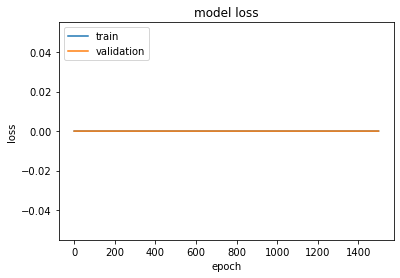

In [37]:
print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

32/32 [==============================] - 0s 1ms/step


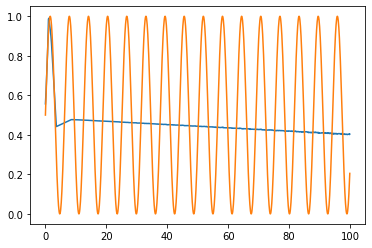

In [38]:
xxpts = np.arange(0, 100, .1)
yypts = model.predict(xxpts)
zpts = (np.sin(xxpts)+1)/2
plt.plot(xxpts, yypts)
plt.plot(xxpts, zpts)
plt.show()